In [1]:
import sys, os
import scDART
import pandas as pd
import numpy as np

In [2]:
sc = scDART.scDART(n_epochs=100)

In [3]:
p = "./data/Endo/"
dataset = (p + "counts_rna.csv", p + "anno_rna.txt", None, p + "counts_atac.csv", p + "anno_atac.txt", None, p+"region2gene.csv")

In [4]:
rna_count = pd.read_csv(dataset[0], index_col=0).values
rna_anno = []
with open(dataset[1], "r") as fp:
    for i in fp:
        rna_anno.append(i.strip("\n"))
rna_anno = np.array(rna_anno)

In [5]:
atac_count = pd.read_csv(dataset[3], index_col=0).values
atac_count = np.where(atac_count < 1, 0, 1)
atac_anno = []
with open(dataset[4], "r") as fp:
    for i in fp:
        atac_anno.append(i.strip("\n"))
atac_anno = np.array(atac_anno)

In [6]:
reg = pd.read_csv(dataset[-1], index_col=0, header=0).values

In [7]:
print(rna_count.shape, rna_anno.shape)
print(atac_count.shape, atac_anno.shape)
print(reg.shape)

(1628, 497) (1628,)
(1186, 11487) (1186,)
(11487, 497)


In [17]:
# sc.fit_transform(rna_count = rna_count, atac_count = atac_count, reg = reg)

Loaded dataset
Device:  cuda
Number of anchor cells not specified, using exact mode for distance calculation instead.
Diffusion distance calculated, time used (sec): 11.452366590499878
Diffusion distance calculated, time used (sec): 6.710965633392334
Model: {'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum

(array([[ 0.33261904,  0.28278977, -0.04301982, ...,  0.17413646,
         -0.03994488,  0.38019946],
        [ 0.10639304,  0.24318212, -0.42031252, ...,  0.1978946 ,
          0.25558317,  0.4228189 ],
        [ 0.09248638,  0.18843582, -0.16817226, ...,  0.45238388,
          0.25031242,  0.5045804 ],
        ...,
        [ 0.57100314,  2.168395  ,  0.18097956, ...,  3.384571  ,
          2.5484557 , -1.5194021 ],
        [ 0.7872518 ,  2.4184916 ,  0.20593448, ...,  3.6878414 ,
          2.4314036 , -1.312911  ],
        [ 0.872808  ,  2.1232648 , -0.2545931 , ...,  3.4250176 ,
          2.6102264 , -1.4819157 ]], dtype=float32),
 array([[ 0.25226867,  0.4431246 , -0.40039486, ...,  0.03732505,
          0.14870346,  0.38334775],
        [ 0.08019903,  0.3261777 , -0.2185266 , ...,  0.5226643 ,
         -0.01770293,  0.15613107],
        [-0.1149145 ,  0.29802096, -0.04182113, ...,  0.3567364 ,
         -0.01783646,  0.34038192],
        ...,
        [ 1.1535242 ,  2.5225673 ,  0.3

In [9]:
# sc.fit(rna_count = rna_count, atac_count = atac_count, reg = reg)

Loaded Dataset
Device:  cuda
Number of anchor cells not specified, using exact mode for distance calculation instead.
Diffusion distance calculated, time used (sec): 10.535895824432373
Diffusion distance calculated, time used (sec): 7.646958351135254
Model: {'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum

In [10]:
# sc.save_model("endo_test.pt")

Model saved


In [12]:
sc.load_model("endo_test.pt")

{'gene_act': gene_act(
  (fc_layers): Sequential(
    (Layer 0): Sequential(
      (linear): Linear(in_features=11487, out_features=512, bias=False)
      (batchnorm): BatchNorm1d(512, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 1): Sequential(
      (linear): Linear(in_features=512, out_features=256, bias=False)
      (batchnorm): BatchNorm1d(256, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
    (Layer 2): Sequential(
      (linear): Linear(in_features=256, out_features=497, bias=False)
      (batchnorm): BatchNorm1d(497, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (act): LeakyReLU(negative_slope=0.2)
      (dropout): None
    )
  )
), 'encoder': Encoder(
  (fc): FC(
    (fc_layers): Sequential(
      (Layer 0): Sequential(
        (linear): Linear(in_features=497, ou

In [13]:
sc.transform(rna_count = rna_count, atac_count = atac_count)

Transform finished


(array([[ 0.02033483, -0.25675404,  0.480945  , ...,  0.22438732,
         -0.04043444, -0.02175011],
        [ 0.10027152, -0.6208596 ,  0.42814207, ...,  0.00423996,
          0.07597476,  0.12679975],
        [-0.07023385, -0.43335557,  0.46737477, ...,  0.25605598,
          0.03851611,  0.22809726],
        ...,
        [ 0.48762116,  2.969917  , -1.6558383 , ...,  2.4922905 ,
          0.9620148 ,  1.2101243 ],
        [ 0.18799707,  2.6513174 , -1.9634745 , ...,  2.4177427 ,
          0.77283514,  1.2914423 ],
        [ 0.14717558,  2.556086  , -2.0192707 , ...,  2.2851176 ,
          0.68331504,  1.4714625 ]], dtype=float32),
 array([[ 4.3383949e-02, -4.3492433e-01,  5.0133502e-01, ...,
          1.4621654e-01,  1.2518649e-01, -1.1555399e-01],
        [ 5.7346985e-02, -3.1469232e-01,  5.8457822e-01, ...,
          1.4536275e-01,  2.4101597e-01,  1.2371893e-01],
        [ 9.1023169e-02, -5.0586390e-01,  6.1038917e-01, ...,
          1.2530683e-01,  1.2233895e-01,  5.0832514e-02]

test_endo_embedding.pdf
Please use embedding, backbone, or pseudotime mode


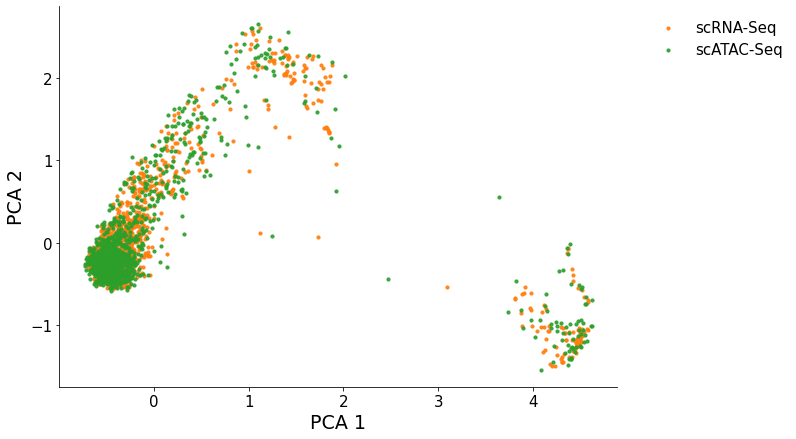

In [14]:
sc.visualize(mode = "embedding", save_path = "test_endo_embedding.pdf")

running Leiden clustering
finished
test_endo_backbone.pdf


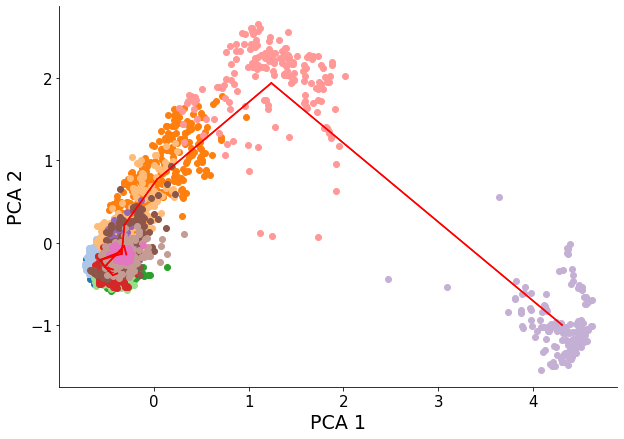

In [15]:
sc.visualize(mode ="backbone", save_path = "test_endo_backbone.pdf")

running Leiden clustering
finished
test_endo_pseudotime.pdf


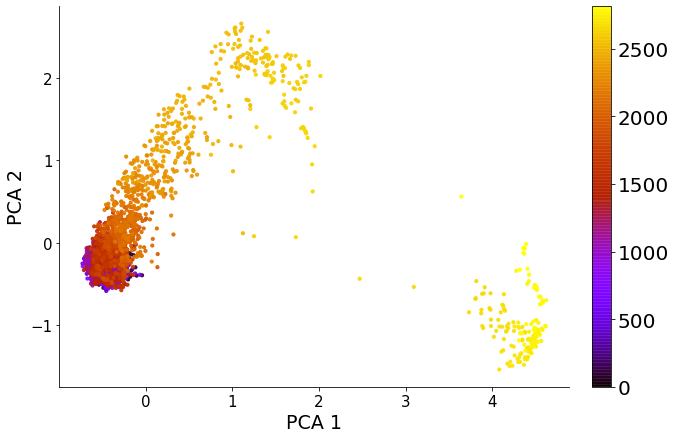

In [16]:
sc.visualize(mode = "pseudotime", save_path = "test_endo_pseudotime.pdf")